## Homework 6

In this homework, we continue using the fuel efficiency dataset.

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

Preparing the dataset
Preparation:

Fill missing values with zeros.  

Do train/validation/test split with 60%/20%/20% distribution.  
Use the train_test_split function and set the random_state parameter to 1.  
Use DictVectorizer(sparse=True) to turn the dataframes into matrices.  

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Sasha/Downloads/car_fuel_efficiency.csv')

In [3]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [4]:
df = df.fillna(0)

In [5]:
df.isnull().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [11]:
df.nunique()

engine_displacement      36
num_cylinders            14
horsepower              193
vehicle_weight         9704
acceleration            163
model_year               24
origin                    3
fuel_type                 2
drivetrain                2
num_doors                 9
fuel_efficiency_mpg    9704
dtype: int64

In [6]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

y_train = df_train.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [7]:
train_dicts = df_train.to_dict(orient='records')

In [8]:
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dicts)

In [26]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.fit_transform(val_dicts)

## Question 1
Let's train a decision tree regressor to predict the fuel_efficiency_mpg variable.

Train a model with max_depth=1.
Which feature is used for splitting the data?

In [14]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [15]:
feature_names = dv.get_feature_names_out()

In [16]:
split_feature = feature_names[dt.tree_.feature[0]]

In [17]:
split_feature

'vehicle_weight'

## Question 2
Train a random forest regressor with these parameters:

n_estimators=10
random_state=1
n_jobs=-1 (optional - to make training faster)  
What's the RMSE of this model on the validation data?

In [20]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [27]:
y_pred_val = rf.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

In [28]:
rmse

np.float64(0.4595777223092726)

## Question 3
Now let's experiment with the n_estimators parameter

Try different values of this parameter from 10 to 200 with step 10.  
Set random_state to 1.  
Evaluate the model on the validation dataset.  
After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.

In [29]:
def tryEstimators(est):
    rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred_val = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    return rmse

In [48]:
rmse_values = []
for e in  range(10, 210, 10):
    rmse = tryEstimators(e).round(4)
    rmse_values.append(rmse)
    print(e, rmse)

10 0.4596
20 0.4596
30 0.4596
40 0.4596
50 0.4596
60 0.4596
70 0.4596
80 0.4596
90 0.4596
100 0.4596
110 0.4596
120 0.4596
130 0.4596
140 0.4596
150 0.4596
160 0.4596
170 0.4596
180 0.4596
190 0.4596
200 0.4596


In [39]:
estimators = range(10, 210, 10)
estimators[rmse_values.index(min(rmse_values))]

20

In [45]:
plt.plot(estimators, rmse_values)

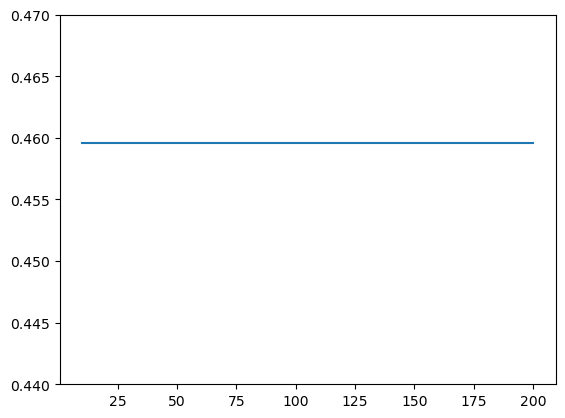

In [46]:
plt.ylim(0.44, 0.47)
plt.show()

## Question 4
Let's select the best max_depth:

Try different values of max_depth: [10, 15, 20, 25]  
For each of these values,  
try different values of n_estimators from 10 till 200 (with step 10)  
calculate the mean RMSE  
Fix the random seed: random_state=1  
What's the best max_depth, using the mean RMSE?  

In [49]:
def tryEstimators2(est, depth):
    rf = RandomForestRegressor(n_estimators=10, max_depth=depth,random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred_val = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    return rmse


In [52]:
def tryDepth(depth):
    rmse_values = []
    for e in  range(10, 210, 10):
        rmse = tryEstimators2(e, depth).round(4)
        rmse_values.append(rmse)
    return np.mean(rmse_values)

In [54]:
for depth in [10, 15, 20, 25]:
    print(depth, tryDepth(depth))

10 0.45020000000000004
15 0.45759999999999995
20 0.45870000000000005
25 0.4595000000000001


## Question 5
We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity   before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.  

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.  

For this homework question, we'll find the most important feature:

Train the model with these parameters:  
n_estimators=10,  
max_depth=20,  
random_state=1,  
n_jobs=-1 (optional)  
Get the feature importance information from this model

In [56]:
rf = RandomForestRegressor(n_estimators=10,
    max_depth=20,
    random_state=1,
    n_jobs=-1
)

In [57]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [58]:
imp = rf.feature_importances_
feature_names = dv.get_feature_names_out()

In [60]:
for name, importance in zip(feature_names, imp):
    print(name, importance)

acceleration 0.011479700631429378
drivetrain=All-wheel drive 0.00035710854930219186
drivetrain=Front-wheel drive 0.00034538411263183524
engine_displacement 0.0032727919136094925
fuel_type=Diesel 0.0003254243228697381
fuel_type=Gasoline 0.00036038360069172903
horsepower 0.015997897714266227
model_year 0.0032123000947946764
num_cylinders 0.0023433469524512048
num_doors 0.0016349895439307014
origin=Asia 0.00046224649550974243
origin=Europe 0.0005187396385869679
origin=USA 0.0005397216891829147
vehicle_weight 0.9591499647407432


In [61]:
feature_names[imp.argmax()]

'vehicle_weight'

## Question 6
Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

Install XGBoost  
Create DMatrix for train and validation  
Create a watchlist  
Train a model with these parameters for 100 rounds:  
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
Now change eta from 0.3 to 0.1.

Which eta leads to the best RMSE score on the validation dataset?

!pip install xgboost

In [63]:
import xgboost as xgb

In [72]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [69]:
xgb_params = { 'eta': 0.3, 'max_depth': 6, 'min_child_weight': 1,

'objective': 'reg:squarederror',
'nthread': 8,

'seed': 1,
'verbosity': 1,
}

In [70]:
model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [73]:
y_pred = model.predict(dval)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))

In [74]:
rmse 

np.float64(0.4596)

In [75]:
xgb_params = { 'eta': 0.1, 'max_depth': 6, 'min_child_weight': 1,

'objective': 'reg:squarederror',
'nthread': 8,

'seed': 1,
'verbosity': 1,
}

In [76]:
model = xgb.train(xgb_params, dtrain, num_boost_round=100)
y_pred = model.predict(dval)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse

np.float64(0.42622800553359225)